# Create submission

In [7]:
import os, random
import ntpath
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from utils import shift_and_stitch, get_output_size, read_img, completeness, save_submission
import callbacks
from models import unet
import pickle
import time

from keras import backend as K

In [19]:
data = pd.read_pickle("test-data-filelist.pkl")

In [20]:
patch_size = (132,132,116)
output_size = get_output_size(patch_size)

In [21]:
model = unet(input_shape=[*patch_size,1])
model.load_weights('weights-2406-231334.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 132, 132, 116, 1)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 130, 130, 114, 32) 896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 130, 130, 114, 32) 128       
_________________________________________________________________
activation_1 (Activation)    (None, 130, 130, 114, 32) 0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 128, 128, 112, 32) 27680     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 112, 32) 128       
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 112, 32) 0         
__________

In [22]:
mask_preds = []
for path in data['image'].values:
    image = read_img(path)
    output = shift_and_stitch(model, image, patch_size, output_size, output_size)
    mask_preds.append(output)

KeyboardInterrupt: 

In [ ]:
np.save('test_segmentations_3',mask_preds[:64])
np.save('test_segmentations_4',mask_preds[64:])

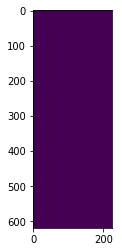

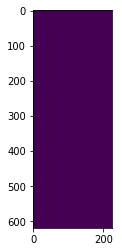

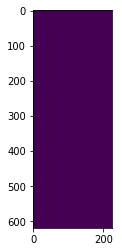

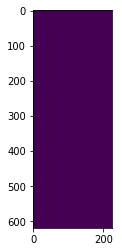

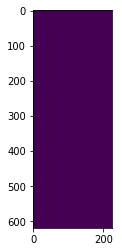

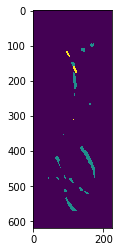

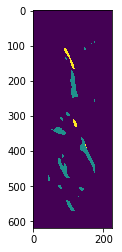

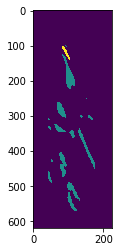

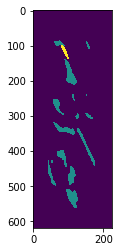

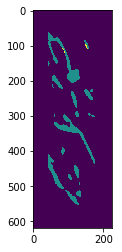

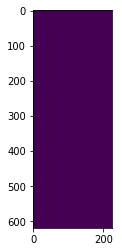

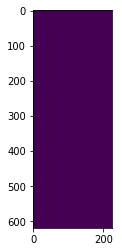

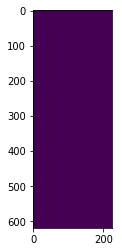

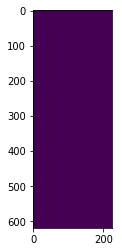

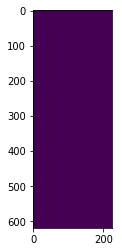

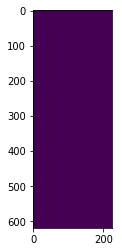

In [10]:
image_0 = mask_preds[0]
for i in range(0, image_0.shape[2], 10):
    plt.imshow(image_0[:,:,i])
    plt.show()

In [24]:
unique, counts = np.unique(image_0, return_counts=True)
counts[1] / (counts[2] + counts[1])

0.953151282553136

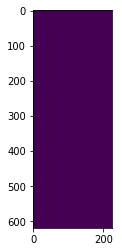

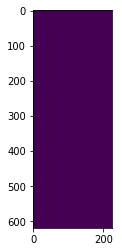

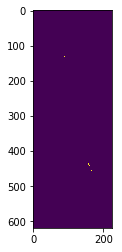

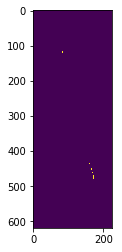

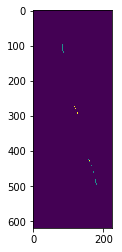

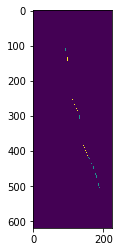

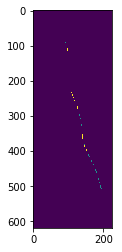

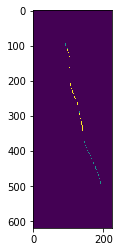

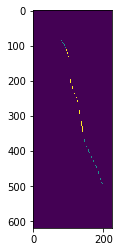

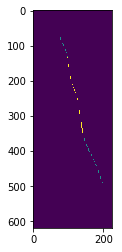

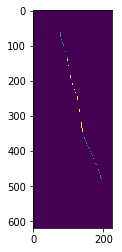

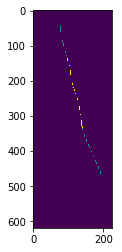

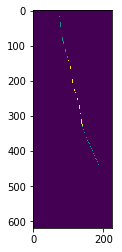

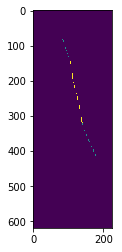

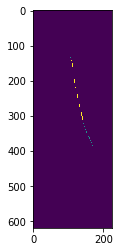

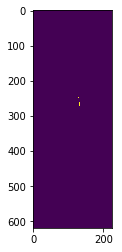

In [26]:
true = read_img(data['fissuremask'].values[0])
for i in range(0, true.shape[2], 10):
    plt.imshow(true[:,:,i])
    plt.show()

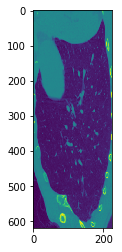

In [12]:
image = read_img(data['image'].values[0])
plt.imshow(image[:,:,75])

# Processing test images

In [10]:
test_data = pd.read_pickle("test-data-filelist.pkl")

In [11]:
"""
test_preds = []
for path in data['image'].values[0:2]:
    image = read_img(path)
    output = shift_and_stitch(model, image, patch_size, output_size, output_size)
    test_preds.append(output)
"""

"\ntest_preds = []\nfor path in data['image'].values[0:2]:\n    image = read_img(path)\n    output = shift_and_stitch(model, image, patch_size, output_size, output_size)\n    test_preds.append(output)\n"

In [12]:
arr1 = np.load("test_segmentations_1.npy")
arr2 = np.load("test_segmentations_2.npy")
arr = np.hstack((arr1, arr2))

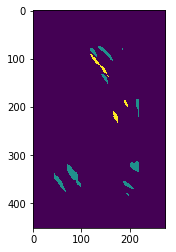

In [18]:
plt.imshow(arr[5][:,:,75])

In [14]:
results = []
for i, pred_segm in enumerate(arr):
    c = completeness(pred_segm) * 100
    if c < 80:
        label = "a"
    elif c < 95:
        label = "b"
    else:
        label = "c"
    print(c, label)
    results.append((test_data["name"].values[i], label))

97.0233531426 c
99.4705809479 c
99.1260466382 c
99.2550858353 c
96.8719677196 c
96.0633844147 c
97.696232175 c
94.1171145603 b
97.7842740138 c
99.5248835992 c
99.6690872094 c
99.6808739972 c
98.4244211484 c
96.4768975191 c
99.1855783814 c
94.5590871128 b
98.9451124925 c
98.9877778223 c
98.2875316714 c
99.5039302981 c
96.0026256628 c
96.7171733643 c
94.5395869657 b
97.8818940191 c
96.6754147115 c
98.0501861473 c
94.6749899906 b
97.774462004 c
99.4137102034 c
96.7663219964 c
95.2232044707 c
98.8574261352 c
98.5781051157 c
95.5343232516 c
97.953731816 c
99.9041354005 c
95.9584209283 c
99.0192429522 c
98.5625680293 c
97.3737529945 c
98.3889663844 c
98.1439120077 c
92.4277417891 b
96.5866898991 c
96.9724129148 c
96.5094235066 c
97.6523283354 c
97.1617247922 c
98.2393757683 c
95.9273644957 c
97.1816551862 c
98.4801177727 c
97.4945790048 c
99.0933008788 c
99.2271734602 c
99.6745408785 c
89.884924751 b
99.9106016211 c
96.0635657022 c
97.0375529657 c
99.0848306542 c
97.4125114516 c
95.226165767

In [15]:
save_submission("submission.csv", results)